# Single qubit GST on the 5 qubit chip (Data from 3.5.2023)

In [1]:
# Note: I removed the mGST folders from within the qibocal fork, such that it is installed and updated seperately
from mGST import compatibility,algorithm, optimization, low_level_jit, additional_fns

In [2]:
import pickle as pickle
from pygsti.report import reportables as rptbl #Needs cvxpy!
import pygsti
from argparse import Namespace
import numpy as np
import pandas as pd
import numpy.linalg as la
import json
import matplotlib.pyplot as plt
#from pygsti.modelpacks import smq2Q_XYICNOT as std

%run ../src/mGST/reporting.py

### Setting the parameters

In [3]:
pdim = 4   # physical dimension
r = pdim**2   # rank of the gate superoperators 

max_l = 10  # maximum number of gates in each measurement sequence
n_povm = 4   # number of POVM-elements
d = 6

In [4]:
from true_values import E_true, X_true, rho_true
X_t = X_true[:d].copy()
E_t = E_true.copy()
rho_t = rho_true.copy()
target_mdl = compatibility.arrays_to_pygsti_model(X_t,E_t,rho_t, basis = 'std') #Save new model with CZ instead of CNOT

### Loading data

In [5]:
# Hardware probabilities
filename = 'data/20230504-1132_cgst_500_5_7_10/20230504-1132_cgst'

with open(filename + '_depth_5.json') as f:
    data = json.load(f)
N = data['nsequences']
l = data['depth']
J5 = np.array([list(np.pad(data['measurements'][i]['circuit'],(0,max_l-l),'constant',constant_values=-1)) for i in range(N)])[:,::-1]
y5 = np.array([[data['measurements'][i]['hardware_probabilities'][basis_str] for i in range(N)] for basis_str in ['00','01','10','11']])

with open(filename + '_depth_7.json') as f:
    data = json.load(f)
N = data['nsequences']
l = data['depth']
J7 = np.array([list(np.pad(data['measurements'][i]['circuit'],(0,max_l-l),'constant',constant_values=-1)) for i in range(N)])[:,::-1]
y7 = np.array([[data['measurements'][i]['hardware_probabilities'][basis_str] for i in range(N)] for basis_str in ['00','01','10','11']])

with open(filename + '_depth_10.json') as f:
    data = json.load(f)
N = data['nsequences']
l = data['depth']
J10 = np.array([list(np.pad(data['measurements'][i]['circuit'],(0,max_l-l),'constant',constant_values=-1)) for i in range(N)])[:,::-1]
y10 = np.array([[data['measurements'][i]['hardware_probabilities'][basis_str] for i in range(N)] for basis_str in ['00','01','10','11']])

J57 = np.concatenate((J5,J7), axis = 0)
y57 = np.concatenate((y5,y7), axis = 1)

J_all = np.concatenate((J57,J10), axis = 0)
y_all = np.concatenate((y57,y10), axis = 1)

meas_samples = data['nshots']

In [6]:
# #Simulation probabilities
# basis_str_dict = {'00':0, '01':1, '10':2, '11':3}
# filename = 'data/20230504-1132_cgst_500_5_7_10/20230504-1132_cgst'

# with open(filename + '_depth_5.json') as f:
#     data = json.load(f)
# N = data['nsequences']
# l = data['depth']
# J5 = np.array([list(np.pad(data['measurements'][i]['circuit'],(0,max_l-l),'constant',constant_values=-1)) for i in range(N)])[:,::-1]
# y5 = np.zeros((n_povm,N))
# for i in range(N):
#     keylist = [key for key in data['measurements'][i]['simulation_probabilities'].keys()]
#     for key in data['measurements'][i]['simulation_probabilities'].keys():
#         y5[basis_str_dict[key],i] = data['measurements'][i]['simulation_probabilities'][key]

# with open(filename + '_depth_7.json') as f:
#     data = json.load(f)
# N = data['nsequences']
# l = data['depth']
# J7 = np.array([list(np.pad(data['measurements'][i]['circuit'],(0,max_l-l),'constant',constant_values=-1)) for i in range(N)])[:,::-1]
# y7 = np.zeros((n_povm,N))
# for i in range(N):
#     keylist = [key for key in data['measurements'][i]['simulation_probabilities'].keys()]
#     for key in data['measurements'][i]['simulation_probabilities'].keys():
#         y7[basis_str_dict[key],i] = data['measurements'][i]['simulation_probabilities'][key]

# with open(filename + '_depth_10.json') as f:
#     data = json.load(f)
# N = data['nsequences']
# l = data['depth']
# J10 = np.array([list(np.pad(data['measurements'][i]['circuit'],(0,max_l-l),'constant',constant_values=-1)) for i in range(N)])[:,::-1]
# y10 = np.zeros((n_povm,N))
# for i in range(N):
#     for key in data['measurements'][i]['simulation_probabilities'].keys():
#         y10[basis_str_dict[key],i] = data['measurements'][i]['simulation_probabilities'][key]

# J57 = np.concatenate((J5,J7), axis = 0)
# y57 = np.concatenate((y5,y7), axis = 1)

# J_all = np.concatenate((J57,J10), axis = 0)
# y_all = np.concatenate((y57,y10), axis = 1)

# meas_samples = data['nshots']

### GST

Starting optimization...
ERROR! Session/line number was not unique in database. History logging moved to new session 345
100%|█████████████████████████████████████████| 150/150 [01:40<00:00,  1.49it/s]


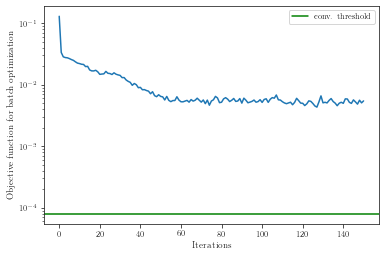

Maximum number of reinitializations reached without reaching success threshold, attempting optimization over full data set...
 97%|█████████████████████████████████████████▌ | 29/30 [01:37<00:03,  3.35s/it]


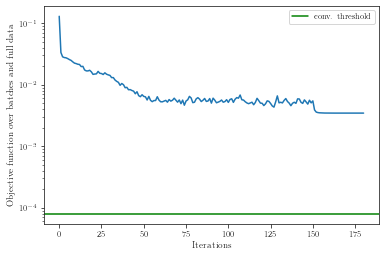

#################
	 Convergence criterion not satisfied, try increasing max_iter or using new initializations.
	 Final objective function value 0.0034605224840984798 with # of initializations: 1 
 	 Total runtime: 197.8467321395874
Starting optimization...
100%|█████████████████████████████████████████| 150/150 [01:46<00:00,  1.41it/s]


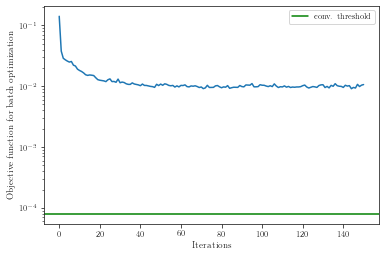

Maximum number of reinitializations reached without reaching success threshold, attempting optimization over full data set...
100%|███████████████████████████████████████████| 30/30 [01:40<00:00,  3.36s/it]


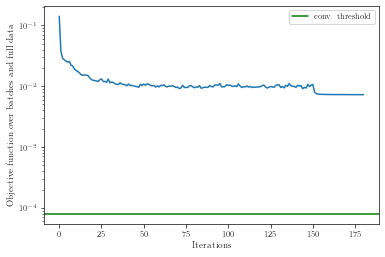

#################
	 Convergence criterion not satisfied, try increasing max_iter or using new initializations.
	 Final objective function value 0.007255614995988989 with # of initializations: 1 
 	 Total runtime: 207.40356040000916
Starting optimization...
100%|█████████████████████████████████████████| 150/150 [01:45<00:00,  1.42it/s]


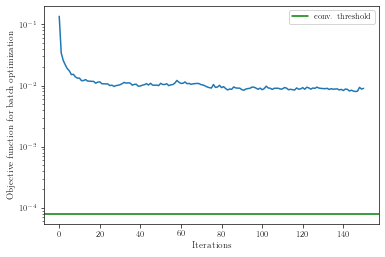

Maximum number of reinitializations reached without reaching success threshold, attempting optimization over full data set...
100%|███████████████████████████████████████████| 30/30 [01:39<00:00,  3.30s/it]


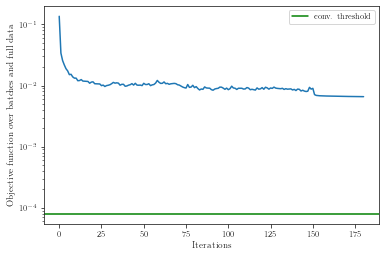

#################
	 Convergence criterion not satisfied, try increasing max_iter or using new initializations.
	 Final objective function value 0.006578471185828739 with # of initializations: 1 
 	 Total runtime: 205.16655015945435
Starting optimization...
100%|█████████████████████████████████████████| 150/150 [01:44<00:00,  1.44it/s]


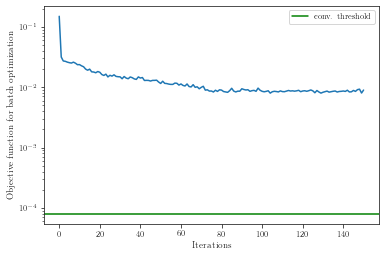

Maximum number of reinitializations reached without reaching success threshold, attempting optimization over full data set...
100%|███████████████████████████████████████████| 30/30 [01:39<00:00,  3.32s/it]


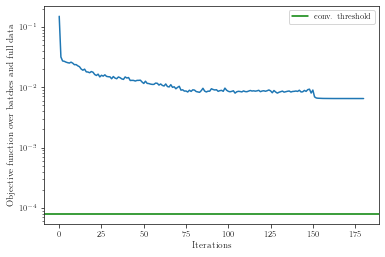

#################
	 Convergence criterion not satisfied, try increasing max_iter or using new initializations.
	 Final objective function value 0.0064728171074086025 with # of initializations: 1 
 	 Total runtime: 204.16058039665222
Starting optimization...
100%|█████████████████████████████████████████| 150/150 [01:46<00:00,  1.41it/s]


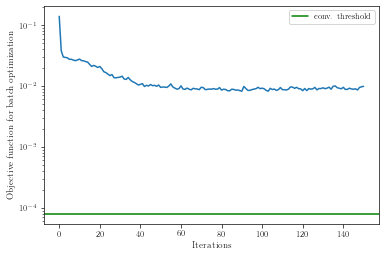

Maximum number of reinitializations reached without reaching success threshold, attempting optimization over full data set...
100%|███████████████████████████████████████████| 30/30 [01:38<00:00,  3.29s/it]


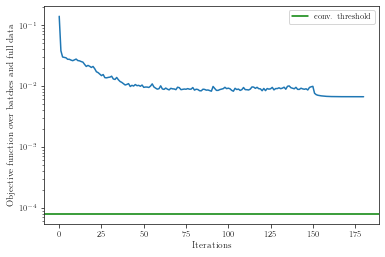

#################
	 Convergence criterion not satisfied, try increasing max_iter or using new initializations.
	 Final objective function value 0.006655207039481345 with # of initializations: 1 
 	 Total runtime: 205.52036356925964
Starting optimization...
100%|█████████████████████████████████████████| 150/150 [01:46<00:00,  1.41it/s]


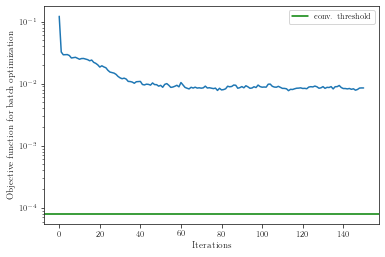

Maximum number of reinitializations reached without reaching success threshold, attempting optimization over full data set...
100%|███████████████████████████████████████████| 30/30 [01:40<00:00,  3.35s/it]


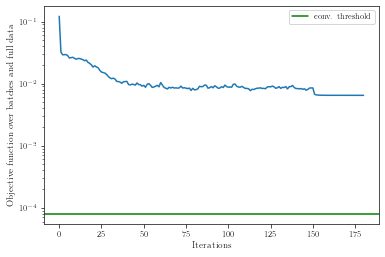

#################
	 Convergence criterion not satisfied, try increasing max_iter or using new initializations.
	 Final objective function value 0.006472932310360915 with # of initializations: 1 
 	 Total runtime: 206.88729619979858
Starting optimization...
100%|█████████████████████████████████████████| 150/150 [01:45<00:00,  1.42it/s]


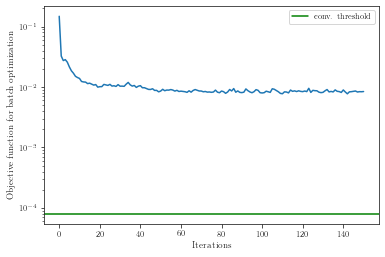

Maximum number of reinitializations reached without reaching success threshold, attempting optimization over full data set...
100%|███████████████████████████████████████████| 30/30 [01:40<00:00,  3.36s/it]


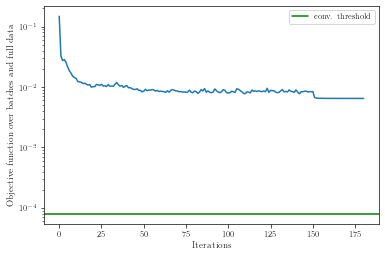

#################
	 Convergence criterion not satisfied, try increasing max_iter or using new initializations.
	 Final objective function value 0.006477350929892505 with # of initializations: 1 
 	 Total runtime: 207.25989937782288
Starting optimization...
100%|█████████████████████████████████████████| 150/150 [01:44<00:00,  1.44it/s]


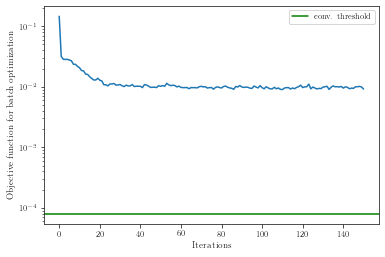

Maximum number of reinitializations reached without reaching success threshold, attempting optimization over full data set...
100%|███████████████████████████████████████████| 30/30 [01:39<00:00,  3.31s/it]


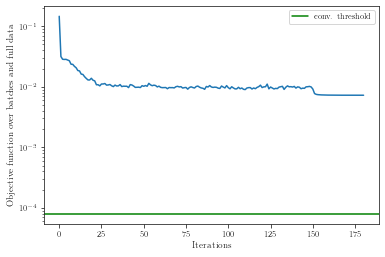

#################
	 Convergence criterion not satisfied, try increasing max_iter or using new initializations.
	 Final objective function value 0.007254114727985907 with # of initializations: 1 
 	 Total runtime: 203.68042755126953
Starting optimization...
100%|█████████████████████████████████████████| 150/150 [01:43<00:00,  1.45it/s]


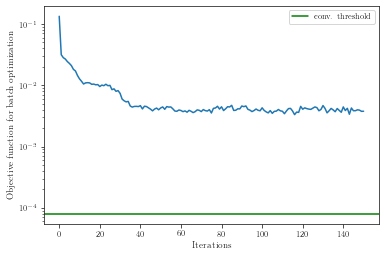

Maximum number of reinitializations reached without reaching success threshold, attempting optimization over full data set...
 83%|███████████████████████████████████▊       | 25/30 [01:25<00:17,  3.44s/it]


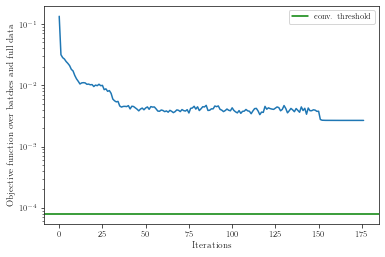

#################
	 Convergence criterion not satisfied, try increasing max_iter or using new initializations.
	 Final objective function value 0.0026697069607779854 with # of initializations: 1 
 	 Total runtime: 189.92884731292725
Starting optimization...
100%|█████████████████████████████████████████| 150/150 [01:41<00:00,  1.48it/s]


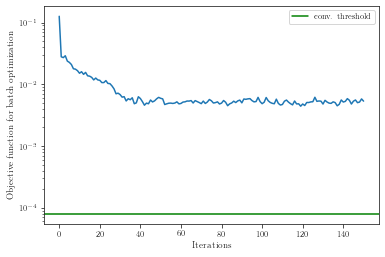

Maximum number of reinitializations reached without reaching success threshold, attempting optimization over full data set...
 77%|████████████████████████████████▉          | 23/30 [01:17<00:23,  3.38s/it]


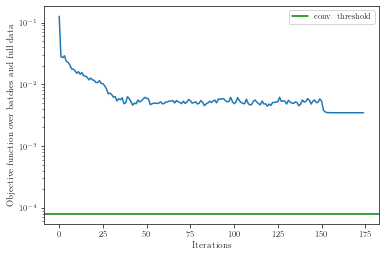

#################
	 Convergence criterion not satisfied, try increasing max_iter or using new initializations.
	 Final objective function value 0.003460523181771912 with # of initializations: 1 
 	 Total runtime: 179.7067847251892
Starting optimization...
100%|█████████████████████████████████████████| 150/150 [01:43<00:00,  1.45it/s]


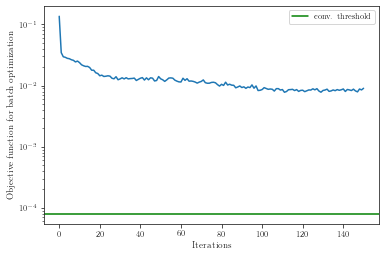

Maximum number of reinitializations reached without reaching success threshold, attempting optimization over full data set...
 63%|███████████████████████████▏               | 19/30 [01:01<00:36,  3.28s/it]

In [ ]:
bsize = 120   # The batch size on which the optimization is started
results = []
rK = 1
for _ in range(20):  
    K_t = additional_fns.Kraus_rep(X_t,d,pdim,rK)
    K,X,E,rho,res_list = algorithm.run_mGST(y57, J57, max_l,d,r,rK, n_povm, bsize, meas_samples, method = 'SFN',
                         max_inits = 1, max_iter = 150, final_iter = 30, threshold_multiplier = 5, 
                         target_rel_prec = 1e-5, testing = True)   
    # K,X,E,rho,res_list = algorithm.run_mGST(y_all,J_all, max_l,d,r,rK, n_povm, bsize, meas_samples, method = 'SFN',
    #                      max_inits = 10, max_iter = 0, final_iter = 30, threshold_multiplier = 500, 
    #                      target_rel_prec = 1e-4, init = [K,E,rho], testing = True)   
    results.append([K,X,E,rho])

In [10]:
# ###################################### 
# filename = 'rank_3_simulated_probs_1132'
# parameters = {'sequence length':l,'gate count':d,'Kraus ranks':[3],'phys. dimension':int(np.sqrt(r)), 'Sequence count': N, 
#               'J':J57,'y':y57, 'target_rel_prec':1e-4}
# data_to_safe = {'parameters':parameters, 'results':results}

# with open(filename, 'wb') as handle:
#     pickle.dump(data_to_safe, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
with open("rank_16_hardware_probs_1132", 'rb') as handle:
    b = pickle.load(handle)
results = b['results']

In [8]:
weights = {'G0': 1,'G1': 1, 'G2': 1, 'G3': 1, 'G4': 1, 'G5': 1, 'spam': 1}
gate_labels = {0: "Id", 1: "Rx(pi/2)[q0]", 2: "Ry(pi/2)[q0]", 3: "Rx(pi/2)[q1]", 4: "Ry(pi/2)[q1]", 5: "CZ[q0-q1]"}

X_opt, E_opt, rho_opt = gauge_opt(X, E, rho, target_mdl, weights)
df_g, df_o, s_g, s_o = report(X_opt, E_opt, rho_opt, J_all, y_all, target_mdl, gate_labels)

display(s_g), display(s_o)

,F_avg,Diamond distances
Id,"0,99937","0,00256"
Rx(pi/2)[q0],"0,99963","0,00222"
Ry(pi/2)[q0],"0,99941","0,00207"
Rx(pi/2)[q1],"0,99946","0,00192"
Ry(pi/2)[q1],"0,99927","0,00308"
CZ[q0-q1],"0,99895","0,00334"


,Final cost function value,Mean total variation dist. to data,Mean total variation dist. target to data,POVM - Choi map trace distance,State - Trace distance
,0.000014,0.005328,0.004835,0.000829,0.000934


(None, None)

In [ ]:
for i in range(20):
    K,X,E,rho = results[i][:]
    weights = {'G0': 1,'G1': 1, 'G2': 1, 'G3': 1, 'G4': 1, 'G5': 1, 'spam': 1}
    gate_labels = {0: "Id", 1: "Rx(pi/2)[q0]", 2: "Ry(pi/2)[q0]", 3: "Rx(pi/2)[q1]", 4: "Ry(pi/2)[q1]", 5: "CZ[q0-q1]"}

    X_opt, E_opt, rho_opt = gauge_opt(X, E, rho, target_mdl, weights)
    df_g, df_o, s_g, s_o = report(X_opt, E_opt, rho_opt, J57, y57, target_mdl, gate_labels)

    display(s_g), display(s_o)

In [20]:
weights = {'G0': 1,'G1': 1, 'G2': 1, 'G3': 1, 'G4': 1, 'G5': 1, 'spam': 1}
gate_labels = {0: "Id", 1: "Rx(pi/2)[q0]", 2: "Ry(pi/2)[q0]", 3: "Rx(pi/2)[q1]", 4: "Ry(pi/2)[q1]", 5: "CZ[q0-q1]"}

X_opt, E_opt, rho_opt = gauge_opt(X, E, rho, target_mdl, weights)
df_g, df_o, s_g, s_o = report(X_opt, E_opt, rho_opt, J_all, y_all, target_mdl, gate_labels)

display(s_g), display(s_o)

,F_avg,Diamond distances
Id,"0,99987","0,01754"
Rx(pi/2)[q0],"0,99524","0,06981"
Ry(pi/2)[q0],"0,99646","0,08690"
Rx(pi/2)[q1],"0,99037","0,12911"
Ry(pi/2)[q1],"0,97904","0,14078"
CZ[q0-q1],"0,36040","0,94286"


,Final cost function value,Mean total variation dist. to data,Mean total variation dist. target to data,POVM - Choi map trace distance,State - Trace distance
,0.002672,0.058687,0.213159,0.144853,0.091713


(None, None)

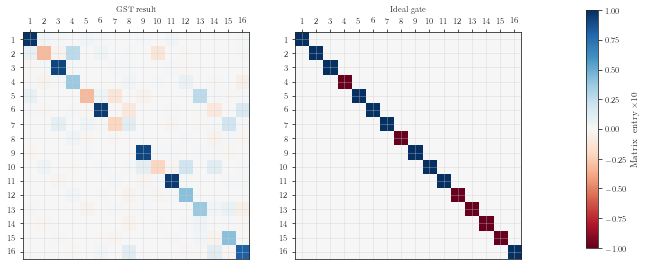

In [17]:
plot_mat(np.real(X_opt[5]), np.real(X_t[5]))

In [31]:
print(low_level_jit.objf(X_t,E_t,rho_t, J57,y57))
print(low_level_jit.objf(X,E,rho, J57,y57))

print(MVE_data(X_t,E_t,rho_t,J57,y57))
print(MVE_data(X,E,rho,J57,y57))

0.014011978719999998
0.006073570611499048
(0.04869140000000004, 0.9999999999999996)
(0.06940252767888164, 0.8310980722743345)


### Rank 1 simulated probabilities

In [16]:
with open("rank_1_from_simulated_probs_10_runs", 'rb') as handle:
    b = pickle.load(handle)
results = b['results']

In [17]:
K,X,E,rho = results[0][:]

weights = {'G0': 1,'G1': 1, 'G2': 1, 'G3': 1, 'G4': 1, 'G5': 1, 'spam': 1}
gate_labels = {0: "Id", 1: "Rx(pi/2)[q0]", 2: "Ry(pi/2)[q0]", 3: "Rx(pi/2)[q1]", 4: "Ry(pi/2)[q1]", 5: "CZ[q0-q1]"}

X_opt, E_opt, rho_opt = gauge_opt(X, E, rho, target_mdl, weights)
df_g, df_o, s_g, s_o = report(X_opt, E_opt, rho_opt, J_all, y_all, target_mdl, gate_labels)

display(s_g), display(s_o)

,F_avg,Diamond distances
Id,"0,99949","0,03319"
Rx(pi/2)[q0],"0,99820","0,06403"
Ry(pi/2)[q0],"0,99900","0,04718"
Rx(pi/2)[q1],"0,99971","0,02557"
Ry(pi/2)[q1],"0,99838","0,05821"
CNOT[q0-q1],"0,39986","1,00000"


,Final cost function value,Mean total variation dist. to data,Mean total variation dist. target to data,POVM - Choi map trace distance,State - Trace distance
,0.015486,0.114983,0.067022,0.069527,0.050744


(None, None)

In [19]:
K_opt = additional_fns.Kraus_rep(X_opt,d,pdim,1)

In [24]:
print(K_opt[5][0])

[[ 9.99902406e-01+0.j          7.72218298e-03-0.00112471j
   6.10650425e-03+0.00148481j  2.13288414e-03+0.00949943j]
 [-7.69238823e-03-0.00108898j  9.99667441e-01+0.01870522j
  -7.23669189e-04-0.00633907j  1.44135717e-02-0.00251073j]
 [-6.43502858e-03+0.00122854j  1.02734539e-03-0.0065589j
   9.96951196e-01+0.07254474j  1.92235383e-02+0.01921029j]
 [-2.52830798e-03+0.00924713j -1.40736113e-02-0.00347602j
  -2.17165799e-02+0.01654575j  9.97386961e-01+0.06458968j]]


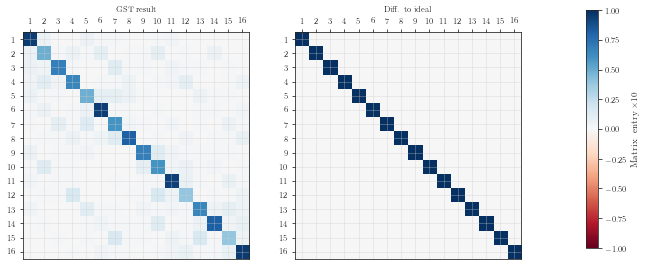

In [14]:
plot_mat(np.abs(X_opt[5]), np.abs(X_t[5]))

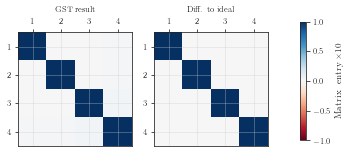

In [20]:
plot_mat(np.abs(K_opt[5][0]), np.abs(K_t[5][0]))

0.0
0.018709264318632915
0.0726385668382582
0.06466860096608343


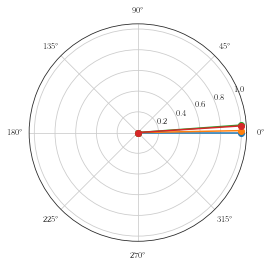

In [21]:
for x in np.diag(K_opt[5][0]):
    print(np.angle(x))
    plt.polar([0,np.angle(x)],[0,abs(x)],marker='o')
plt.show()

# Analysis

### Full rank

In [9]:
with open("rank_16_from_init_hardware_probs_1132", 'rb') as handle:
    b = pickle.load(handle)
results = b['results']

In [10]:
K,X,E,rho = results[0][:]

weights = {'G0': 1,'G1': 1, 'G2': 1, 'G3': 1, 'G4': 1, 'G5': 1, 'spam': 1}
gate_labels = {0: "Id", 1: "Rx(pi/2)[q0]", 2: "Ry(pi/2)[q0]", 3: "Rx(pi/2)[q1]", 4: "Ry(pi/2)[q1]", 5: "CZ[q0-q1]"}

X_opt, E_opt, rho_opt = gauge_opt(X, E, rho, target_mdl, weights)
df_g, df_o, s_g, s_o = report(X_opt, E_opt, rho_opt, J_all, y_all, target_mdl, gate_labels)

display(s_g), display(s_o)

,F_avg,Diamond distances
Id,"0,99981","0,01886"
Rx(pi/2)[q0],"0,99736","0,06978"
Ry(pi/2)[q0],"0,99380","0,07097"
Rx(pi/2)[q1],"0,97579","0,14862"
Ry(pi/2)[q1],"0,96966","0,13100"
CZ[q0-q1],"0,40950","0,95475"


,Final cost function value,Mean total variation dist. to data,Mean total variation dist. target to data,POVM - Choi map trace distance,State - Trace distance
,0.004100,0.081282,0.221379,0.119560,0.082728


(None, None)

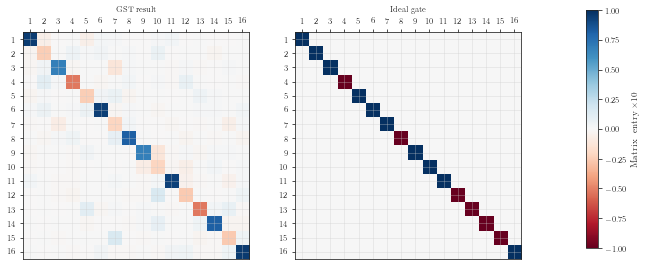

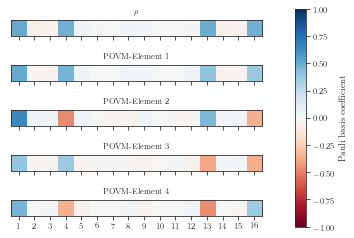

In [11]:
gate_index = 5

X_opt_pp, E_opt_pp, rho_opt_pp = compatibility.std2pp(X_opt,E_opt,rho_opt)
X_t_pp, E_t_pp, rho_t_pp = compatibility.pygsti_model_to_arrays(target_mdl,basis = 'pp')


plot_mat(X_opt[gate_index], X_t[gate_index])
plot_spam(rho_opt_pp, E_opt_pp)

Assignment fidelity for ideal basis state 0: 0.7140673549515567


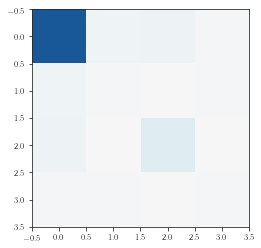

Assignment fidelity for ideal basis state 1: 0.8481359951816153


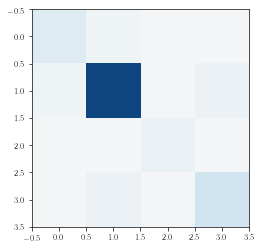

Assignment fidelity for ideal basis state 2: 0.46355187369719203


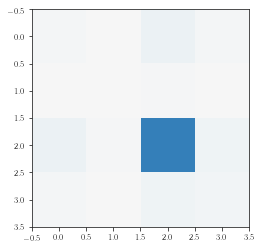

Assignment fidelity for ideal basis state 3: 0.5684939969097486


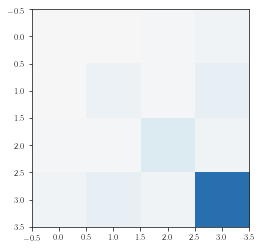

In [28]:
for i in range(4):
    print("Assignment fidelity for ideal basis state %i:"%i, np.abs(E_opt.reshape(4,4,4)[i,i,i])**2)
    plt.imshow(np.abs(E_opt.reshape(4,4,4)[i,:,:]), vmin = -1, vmax = 1)
    plt.show()

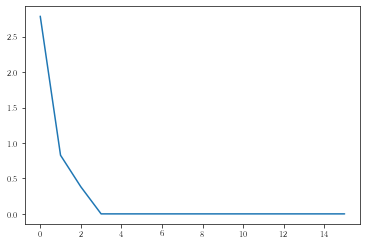

In [15]:
# Spectrum of the Choi matrix
X_choi = X_opt.reshape(d,pdim,pdim,pdim,pdim)
X_choi = np.einsum('ijklm->iljmk',X_choi).reshape(d,pdim**2,pdim**2)
plt.plot(np.sort(np.abs(la.eig(X_choi[5])[0]))[::-1])

In [18]:
from qiskit.quantum_info import entanglement_of_formation

plus_plus = np.outer(np.array([1,1,1,1])/2,np.array([1,1,1,1])/2).reshape(-1)

print(entanglement_of_formation((X_opt[5]@plus_plus).reshape(4,4)))

0.012591550652701854


### Rank 4

In [19]:
with open("ranks_4_from_init", 'rb') as handle:
    b = pickle.load(handle)
results = b['results']

In [20]:
K,X,E,rho = results[0][:]

weights = {'G0': 1,'G1': 1, 'G2': 1, 'G3': 1, 'G4': 1, 'G5': 1, 'spam': 1}
gate_labels = {0: "Id", 1: "Rx(pi/2)[q0]", 2: "Ry(pi/2)[q0]", 3: "Rx(pi/2)[q1]", 4: "Ry(pi/2)[q1]", 5: "CZ[q0-q1]"}

X_opt, E_opt, rho_opt = gauge_opt(X, E, rho, target_mdl, weights)
df_g, df_o, s_g, s_o = report(X_opt, E_opt, rho_opt, J_all, y_all, target_mdl, gate_labels)

display(s_g), display(s_o)

,F_avg,Diamond distances
Id,"0,98466","0,04937"
Rx(pi/2)[q0],"0,97724","0,08978"
Ry(pi/2)[q0],"0,97419","0,09854"
Rx(pi/2)[q1],"0,94845","0,16368"
Ry(pi/2)[q1],"0,95050","0,14989"
CNOT[q0-q1],"0,37837","0,94874"


,Final cost function value,Mean total variation dist. to data,Mean total variation dist. target to data,POVM - Choi map trace distance,State - Trace distance
,0.003927,0.079855,0.221379,0.699667,0.997707


(None, None)

### Rank 1

In [15]:
with open("rank_1_from_init_hardware_probs_1132", 'rb') as handle:
    b = pickle.load(handle)
results = b['results']

In [16]:
K,X,E,rho = results[0][:]

weights = {'G0': 1,'G1': 1, 'G2': 1, 'G3': 1, 'G4': 1, 'G5': 1, 'spam': 1}
gate_labels = {0: "Id", 1: "Rx(pi/2)[q0]", 2: "Ry(pi/2)[q0]", 3: "Rx(pi/2)[q1]", 4: "Ry(pi/2)[q1]", 5: "CZ[q0-q1]"}

X_opt, E_opt, rho_opt = gauge_opt(X, E, rho, target_mdl, weights)
df_g, df_o, s_g, s_o = report(X_opt, E_opt, rho_opt, J_all, y_all, target_mdl, gate_labels)

display(s_g), display(s_o)

,F_avg,Diamond distances
Id,"0,99892","0,04798"
Rx(pi/2)[q0],"0,99901","0,04744"
Ry(pi/2)[q0],"0,99632","0,08398"
Rx(pi/2)[q1],"0,99120","0,11652"
Ry(pi/2)[q1],"0,99138","0,12533"
CZ[q0-q1],"0,33972","1,00000"


,Final cost function value,Mean total variation dist. to data,Mean total variation dist. target to data,POVM - Choi map trace distance,State - Trace distance
,0.006186,0.102388,0.221379,0.159434,0.187492


(None, None)

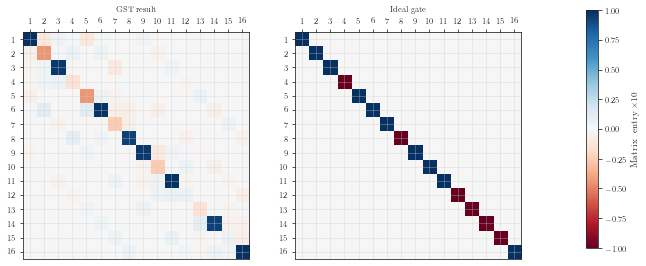

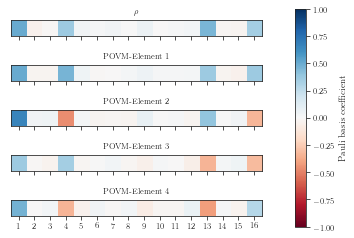

In [17]:
gate_index = 5

X_opt_pp, E_opt_pp, rho_opt_pp = compatibility.std2pp(X_opt,E_opt,rho_opt)
X_t_pp, E_t_pp, rho_t_pp = compatibility.pygsti_model_to_arrays(target_mdl,basis = 'pp')


plot_mat(X_opt[gate_index], X_t[gate_index])
plot_spam(rho_opt_pp, E_opt_pp)

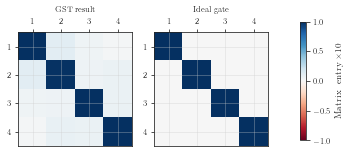

In [18]:
K_opt = additional_fns.Kraus_rep(X_opt,d,pdim,1)
plot_mat(np.abs(K_opt[5][0]), np.abs(K_t[5][0]))

0.0
-2.038862400550034
-0.2046547625025989
-1.71935384831613


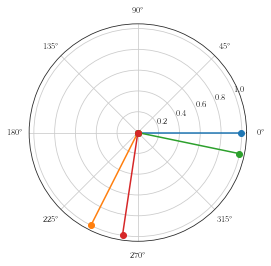

In [19]:
for x in np.diag(K_opt[5][0]):
    print(np.angle(x))
    plt.polar([0,np.angle(x)],[0,abs(x)],marker='o')
plt.show()

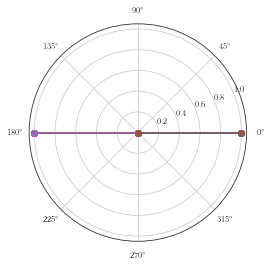

In [20]:
for x in np.diag(X_t[5]):
    plt.polar([0,np.angle(x)],[0,abs(x)],marker='o')
plt.show()